# 1. Overview
In this notebook , we will practice data visualisation in Python using English Premier League data

# 2. load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Import the data
let's import the csv file we just downloaded

In [2]:
data= pd.read_csv("data.csv")
data.head(3)

name     club  age position position_cat  market_value  \
0  Alexis Sanchez  Arsenal   28       LW     Attacker          65.0   
1      Mesut Ozil  Arsenal   28       AM     Attacker          50.0   
2       Petr Cech  Arsenal   35       GK   Goalkeeper           7.0   

   page_views  fpl_value  fpl_sel  fpl_points    region     nationality  \
0        4329       12.0     17.1         264  Americas           Chile   
1        4395        9.5      5.6         167        EU         Germany   
2        1529        5.5      5.9         134        EU  Czech Republic   

   new_foreign  age_cat  club_id  big_club  new_signing  
0            0        4        1         1            0  
1            0        4        1         1            0  
2            0        6        1         1            0

# 4. Transform data 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null object
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null float64
fpl_points      461 non-null int64
region          460 non-null object
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 61.4+ KB


# 5. Start doing some Eploratory data anlysis
# plot

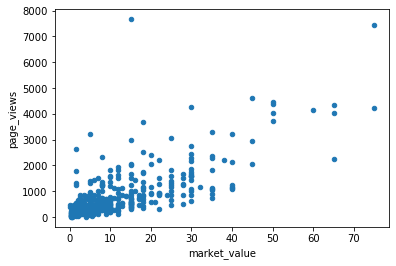

In [4]:
data.plot.scatter(x='market_value', y='page_views')

# matplotlib
#create the same plot using matplotlib

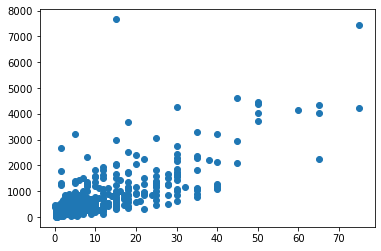

In [5]:
plt.scatter(data.market_value, data.page_views)

Text(0.5, 1.0, 'Fantasy Football Dataset')

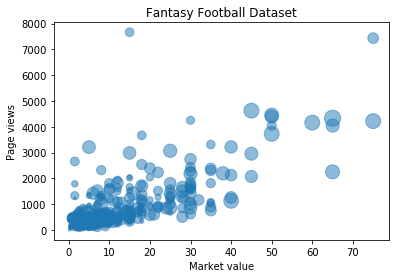

In [6]:
plt.scatter(data.market_value, data.page_views,s=data.fpl_points,alpha=0.5)
plt.xlabel('Market value')
plt.ylabel('Page views')
plt.title('Fantasy Football Dataset')

In [7]:
# Off track - learning how to drop a data without one entry point
data_fixed=data.dropna()
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 460
Data columns (total 17 columns):
name            460 non-null object
club            460 non-null object
age             460 non-null int64
position        460 non-null object
position_cat    460 non-null object
market_value    460 non-null float64
page_views      460 non-null int64
fpl_value       460 non-null float64
fpl_sel         460 non-null float64
fpl_points      460 non-null int64
region          460 non-null object
nationality     460 non-null object
new_foreign     460 non-null int64
age_cat         460 non-null int64
club_id         460 non-null int64
big_club        460 non-null int64
new_signing     460 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 64.7+ KB


# Seaborn
#Matplotlib makes trendline difficult. Let's use trendlines

In [11]:
import seaborn as sns
sns.set()

ImportError: DLL load failed: The specified path is invalid.

In [9]:
sns.relplot(x="market_value", y="page_views", hue='region', data=data)

NameError: name 'sns' is not defined

In [ ]:
sns.regplot(x='market_value', y='page_views', data=data)

In [ ]:
sns.distplot(data.age)

# Bokeh
#switch to bokeh to use interactivity

In [ ]:
# get bokeh functions to plot a fegure and read data in columns 
from bokeh.plotting import figure, ColumnDataSource

# get bokek fi=unction for outputs 
from bokeh.io import output_file, show, output_notebook

# get bokeh function to use tyhe HoverTool
from bokeh.models import HoverTool

# display bokeh figures inline (inside jupyter notebook)
output_notebook()

In [ ]:
# Turn page_views into bubble sizes and use min_size and factor to tweak.
scaling = 1.5
pageview_size = np.sqrt(data.page_views / np.pi)/scaling
min_size = 3
pageview_size = pageview_size.where(
                  pageview_size >= min_size
                  ).fillna(min_size)

# add the pageview_size column to data and adjust source to new dataframe.
data1 = data.assign(pageview_size=pageview_size.values)

# create a ColumnDataSource from our df: source
source=ColumnDataSource(data1)

# create the figure: p
p=figure(tools=['hover'])

# in figure p, display the points as circles

p.circle('market_value', 'fpl_points', source=source, color='blue', size='pageview_size',  alpha=0.5)
p.xaxis.axis_label = 'Market value'
p.yaxis.axis_label = 'Points'

# specify the hover tool
hover=HoverTool(tooltips=[('Name','@name'),('Team','@club'),('Age', '@age'),('position','@position')])

p.add_tools(hover)

show(p)

In [ ]:
heatdata = data.pivot_table(index='club', columns='position', values='market_value', aggfunc='mean')
heatdata

In [ ]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(heatdata, annot=False, fmt='d', linewidths=.5, ax=ax)

In [ ]:
pageview_size.head()
